# Parameter Setting by Optimization 

![](banner_optimization.jpg)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
update_geom_defaults("point", list(size=3, colour="grey40"))
update_geom_defaults("segment", list(colour="grey40"))
update_geom_defaults("line", list(color="black", size=0.15))
update_geom_defaults("abline", list(color="grey40", size=0.15))

== document setup ==

## Introduction

## Synopsis

Some model construction methods rely on having an appropriate optimization method to set parameters to satisfy a criterion for best fit.

Here are some optimization methods ...
* Batch Gradient Descent
* Iterative Gradient Descent
* Stochastic Gradient Descent
* Newton's 2nd Order
* other optimization methods

**Terms**
* Model parameters
* Optimization

## Exposition

### Set Parameters | Cost Function: Sum of Squared Errors

#### Data

Consider this dataset.

x1,outcome
1.0,1.0
2.0,0.5
3.0,3.0
4.0,3.0
6.0,4.0
6.5,5.5
7.0,7.0
9.0,6.0


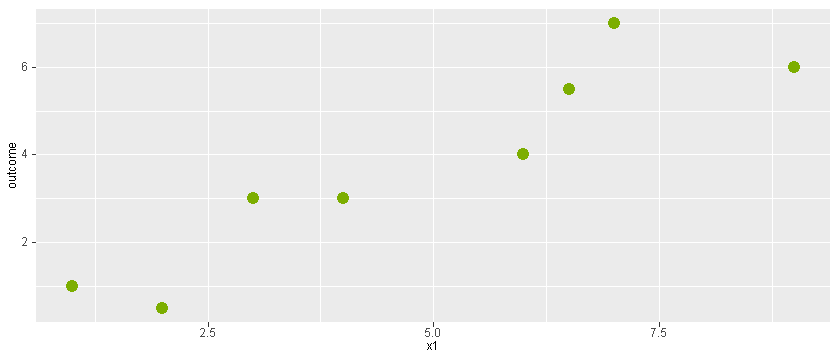

In [2]:
data = data.frame(x1=c(1.0, 2.0, 3.0, 4.0, 6.0, 6.5, 7.0, 9.0), outcome=c( 1.0, 0.5, 3.0, 3.0, 4.0, 5.5, 7.0, 6.0))

data %>% caption

ggplot(data) +
geom_point(aes(x=x1, y=outcome), color=PALETTE[3])

#### Model

Form of model:
$$ \hat{y} = mx$$
 
Criterion for best fit (cost function):
$$ minimize \sum_{i=1}^N (y_i - \hat{y}_i)^2 = minimize \sum_{i=1}^N (y_i - mx_i)^2 $$

Criterion change rate (derivative of cost function):
$$ slope = -2 \sum_{i=1}^N (y_i - \hat{y}_i)x_i = -2 \sum_{i=1}^N (y_i - mx_i)x_i $$

In [3]:
model = function(x, m) { m*x }
cost = function(m, x, y) { sum(aaply(y-model(x,m), 1, function(x) x*x)) }                   
cost_slope = function(m, x, y) { -2*sum((y-model(x,m))*x) }
                                     
data.frame(model="function defined", cost="function defined", cost_slope="function defined" )

model,cost,cost_slope
function defined,function defined,function defined


#### Iterate

**Initialize**

In [4]:
R = 0.001
m.start = -0.5

data.frame(R, m.start)

R,m.start
0.001,-0.5


**Iteration 0**

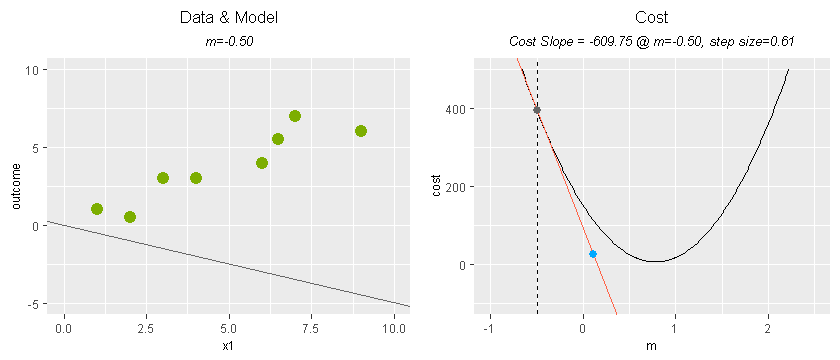

In [5]:
m = m.start
step_size = R*cost_slope(m, data$x1, data$outcome)
m.next = m - step_size

p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("m=%0.2f", m)) +
     xlim(0, 10) +  ylim(-5,10) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_abline(intercept=0, slope=m)

d = data.frame(m=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(m) cost(m, data$x1, data$outcome)))
tangent.intercept = cost(m, data$x1, data$outcome)-cost_slope(m, data$x1, data$outcome)*m
tangent.slope = cost_slope(m, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ m=%0.2f, step size=%0.2f", cost_slope(m, data$x1, data$outcome), m, -step_size)) +
     xlim(-1,2.5) + ylim(-100, 500) +
     geom_line(aes(x=m, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=m, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=m, y=cost(m, data$x1, data$outcome), size=2) +
     geom_point(x=m.next, y=tangent.intercept+tangent.slope*m.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 1**

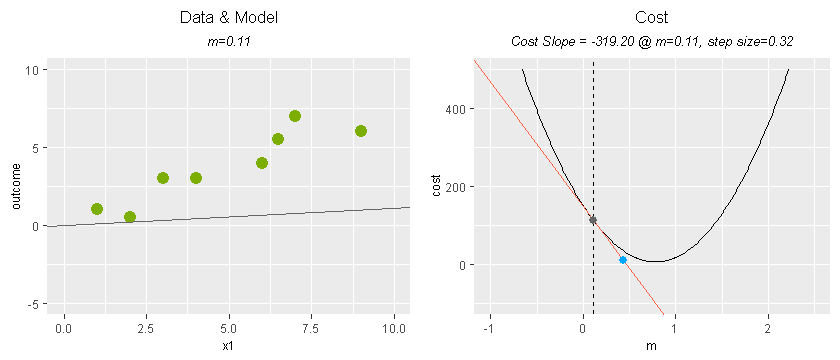

In [6]:
m = m.start
step_size = R*cost_slope(m, data$x1, data$outcome)
m = m - step_size

step_size = R*cost_slope(m, data$x1, data$outcome)
m.next = m - step_size

p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("m=%0.2f", m)) +
     xlim(0, 10) +  ylim(-5,10) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_abline(intercept=0, slope=m)

d = data.frame(m=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(m) cost(m, data$x1, data$outcome)))
tangent.intercept = cost(m, data$x1, data$outcome)-cost_slope(m, data$x1, data$outcome)*m
tangent.slope = cost_slope(m, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ m=%0.2f, step size=%0.2f", cost_slope(m, data$x1, data$outcome), m, -step_size)) +
     xlim(-1,2.5) + ylim(-100, 500) +
     geom_line(aes(x=m, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=m, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=m, y=cost(m, data$x1, data$outcome), size=2) +
     geom_point(x=m.next, y=tangent.intercept+tangent.slope*m.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 2**

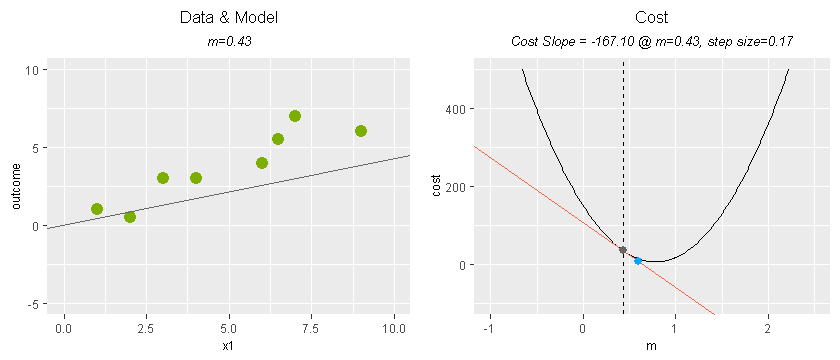

In [7]:
m = m.start
for (i in 1:2) { step_size = R*cost_slope(m, data$x1, data$outcome)
                 m = m - step_size }

step_size = R*cost_slope(m, data$x1, data$outcome)
m.next = m - step_size

p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("m=%0.2f", m)) +
     xlim(0, 10) +  ylim(-5,10) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_abline(intercept=0, slope=m)

d = data.frame(m=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(m) cost(m, data$x1, data$outcome)))
tangent.intercept = cost(m, data$x1, data$outcome)-cost_slope(m, data$x1, data$outcome)*m
tangent.slope = cost_slope(m, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ m=%0.2f, step size=%0.2f", cost_slope(m, data$x1, data$outcome), m, -step_size)) +
     xlim(-1,2.5) + ylim(-100, 500) +
     geom_line(aes(x=m, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=m, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=m, y=cost(m, data$x1, data$outcome), size=2) +
     geom_point(x=m.next, y=tangent.intercept+tangent.slope*m.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 20**

Batch gradient descent converges to optimal solution at m = 0.78.

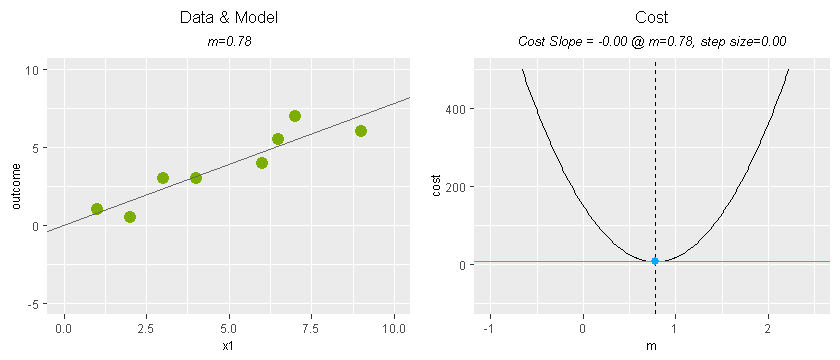

In [8]:
m = m.start
for (i in 1:20) { step_size = R*cost_slope(m, data$x1, data$outcome)
                  m = m - step_size }

step_size = R*cost_slope(m, data$x1, data$outcome)
m.next = m - step_size

p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("m=%0.2f", m)) +
     xlim(0, 10) +  ylim(-5,10) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_abline(intercept=0, slope=m)

d = data.frame(m=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(m) cost(m, data$x1, data$outcome)))
tangent.intercept = cost(m, data$x1, data$outcome)-cost_slope(m, data$x1, data$outcome)*m
tangent.slope = cost_slope(m, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ m=%0.2f, step size=%0.2f", cost_slope(m, data$x1, data$outcome), m, -step_size)) +
     xlim(-1,2.5) + ylim(-100, 500) +
     geom_line(aes(x=m, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=m, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=m, y=cost(m, data$x1, data$outcome), size=2) +
     geom_point(x=m.next, y=tangent.intercept+tangent.slope*m.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

### Set Parameters | Cost Function: Sum of Squared Errors, Non-Convex

#### Data

Consider this dataset.

x1,outcome
-5.0,1
-3.0,1
-2.0,1
1.0,1
2.0,0
3.0,1
3.5,0
4.0,0
6.0,0
6.5,0


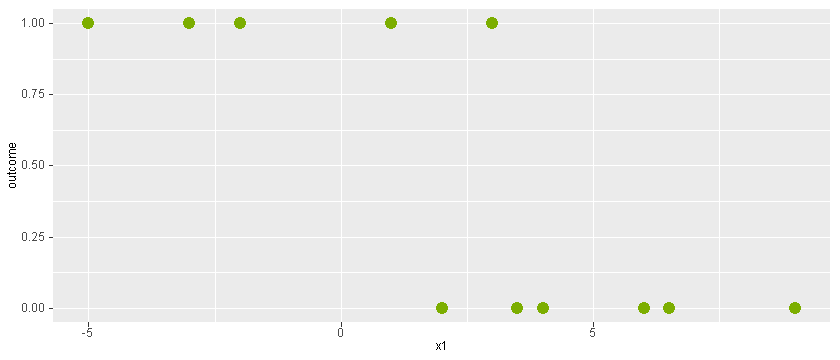

In [9]:
data = data.frame(x1=c(-5.0, -3.0, -2.0, 1.0, 2.0, 3.0, 3.5, 4.0, 6.0, 6.5, 9.0), outcome=c( 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0))

data %>% caption

ggplot(data) +
geom_point(aes(x=x1, y=outcome), color=PALETTE[3])

#### Model

Form of model:
$$ \hat{y} = \frac{1}{1 + e^{-bx}} $$
 
Criterion for best fit (cost function):
$$ minimize \sum_{i=1}^N (y_i - \hat{y}_i)^2 = minimize \sum_{i=1}^N \big(y_i - \frac{1}{1 + e^{-bx}}\big)^2 $$

Criterion change rate (derivative of cost function):
$$ estimated ... $$

In [10]:
model = function(x, b) { 1 / (1 + exp(-b*x)) }
cost = function(b, x, y) { sum(aaply(y-model(x,b), 1, function(x) x*x)) }              
cost_slope = function(b, x, y) { (cost(b+0.1,x,y)-cost(b-0.1,x,y))/0.2 }
                                     
data.frame(model="function defined", cost="function defined", cost_slope="function defined" )

model,cost,cost_slope
function defined,function defined,function defined


#### Iterate

**Initialize**

In [11]:
R = 2
b.start = -2

data.frame(R, b.start)

R,b.start
2,-2


**Iteration 0**

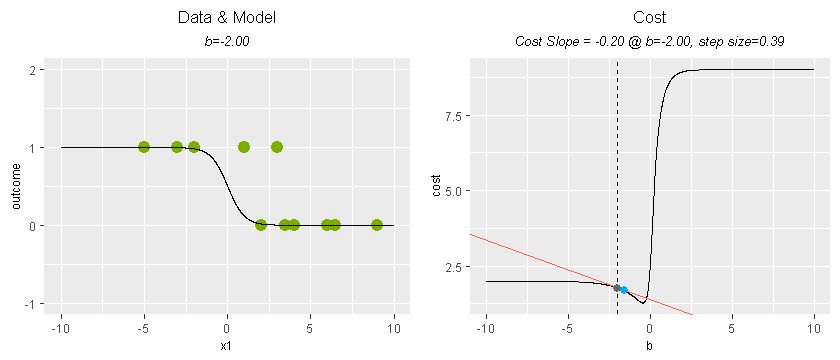

In [12]:
b = b.start
step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-10, 10, 0.01), outcome=aaply(seq(-10, 10, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-10, 10) +  ylim(-1,2) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
#      xlim(-10,10) + ylim(-100, 500) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 1**

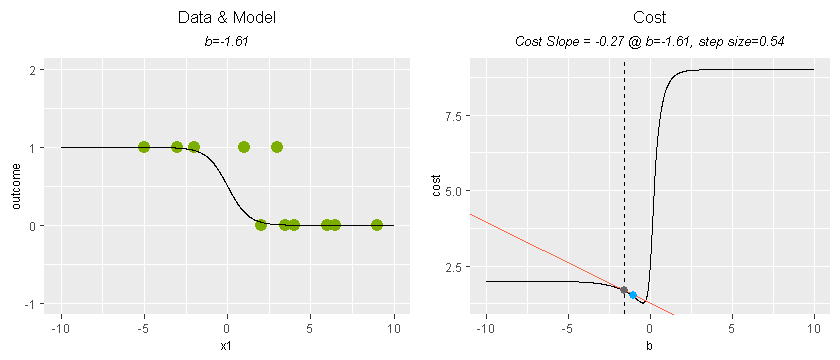

In [13]:
b = b.start
step_size = R*cost_slope(b, data$x1, data$outcome)
b = b - step_size

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-10, 10, 0.01), outcome=aaply(seq(-10, 10, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-10, 10) +  ylim(-1,2) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
#      xlim(-10,10) + ylim(-100, 500) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 2**

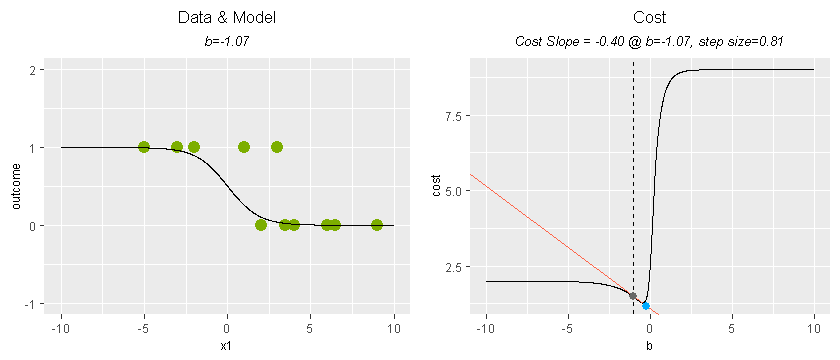

In [14]:
b = b.start
for (i in 1:2) { step_size = R*cost_slope(b, data$x1, data$outcome)
                 b = b - step_size }

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-10, 10, 0.01), outcome=aaply(seq(-10, 10, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-10, 10) +  ylim(-1,2) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
#      xlim(-10,10) + ylim(-100, 500) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 3**

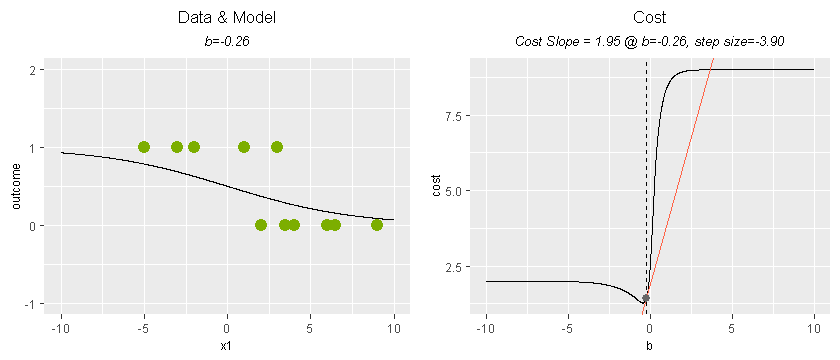

In [15]:
b = b.start
for (i in 1:3) { step_size = R*cost_slope(b, data$x1, data$outcome)
                 b = b - step_size }

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-10, 10, 0.01), outcome=aaply(seq(-10, 10, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-10, 10) +  ylim(-1,2) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
#      xlim(-10,10) + ylim(-100, 500) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 4**

Batch gradient descent with sum of squared errors criterion for best fit does not converge quickly (or possibly ever).

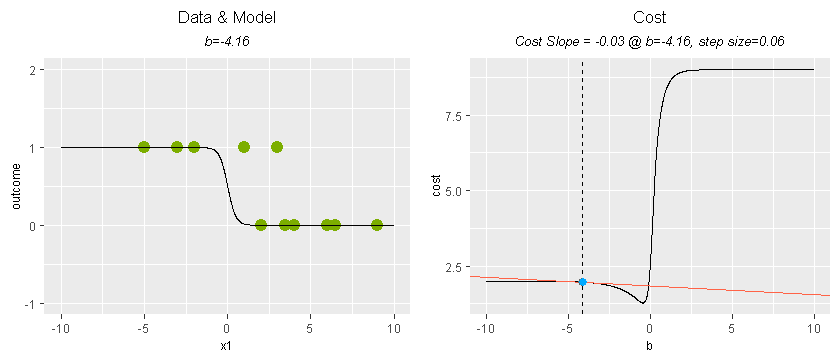

In [16]:
b = b.start
for (i in 1:4) { step_size = R*cost_slope(b, data$x1, data$outcome)
                 b = b - step_size }

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-10, 10, 0.01), outcome=aaply(seq(-10, 10, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-10, 10) +  ylim(-1,2) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
#      xlim(-10,10) + ylim(-100, 500) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

### Set Parameters | Cost Function: Special for Logistic Regression

#### Data

Consider this dataset.

x1,outcome
-5.0,1
-3.0,1
-2.0,1
1.0,1
2.0,0
3.0,1
3.5,0
4.0,0
6.0,0
6.5,0


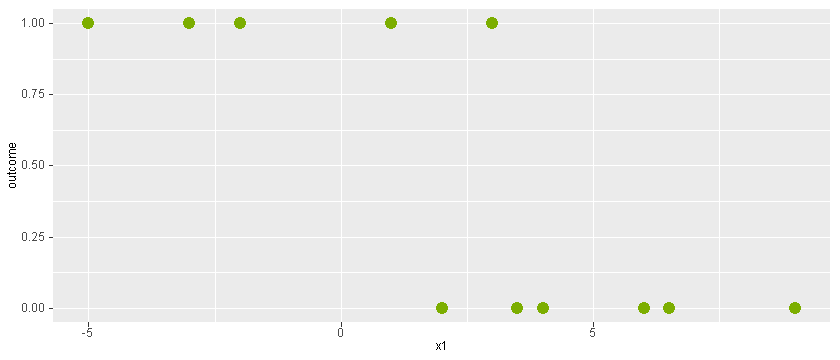

In [17]:
data = data.frame(x1=c(-5.0, -3.0, -2.0, 1.0, 2.0, 3.0, 3.5, 4.0, 6.0, 6.5, 9.0), outcome=c( 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0))

data %>% caption

ggplot(data) +
geom_point(aes(x=x1, y=outcome), color=PALETTE[3])

#### Model

Form of model:
$$ \hat{y} = \frac{1}{1 + e^{-bx}} $$
 
Criterion for best fit (cost function):
$$ minimize \sum_{i=1}^N -\big(y_i - log(\hat{y}_i)\big) - \big((1-y_i)log(1-\hat{y}_i)\big) =$$
$$minimize \sum_{i=1}^N -\big(y_i - log\big(\frac{1}{1 + e^{-bx_i}}\big)\big) - \big((1-y_i)log\big(1-\frac{1}{1 + e^{-bx_i}}\big)\big) $$

Criterion change rate (derivative of cost function):
$$ slope = - \sum_{i=1}^N (y_i - \hat{y}_i)x_i = - \sum_{i=1}^N \big(y_i - \frac{1}{1 + e^{-bx_i}}\big)x_i $$

In [18]:
model = function(x, b) { 1 / (1 + exp(-b*x)) }
cost = function(b, x, y) { sum(-y*log(model(x,b)) + -(1-y)*log(1-model(x,b))) }
cost_slope = function(b, x, y) { -sum((y-model(x,b))*x) }

data.frame(model="function defined", cost="function defined", cost_slope="function defined" )

model,cost,cost_slope
function defined,function defined,function defined


#### Iterate

**Initialize**

In [19]:
R = 0.15
b.start = -2

data.frame(R, b.start)

R,b.start
0.15,-2


**Iteration 0**

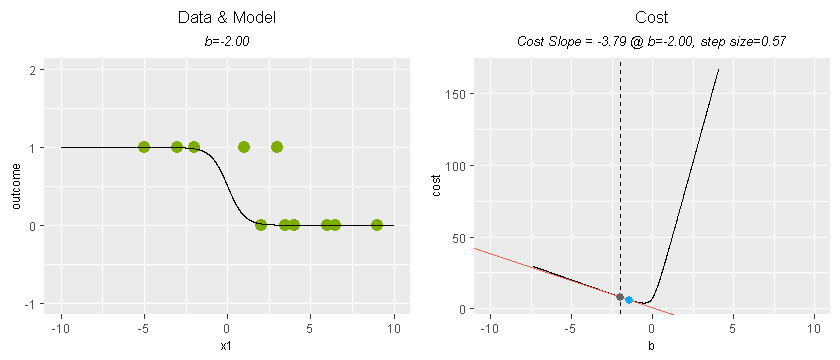

In [20]:
b = b.start
step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-10, 10, 0.01), outcome=aaply(seq(-10, 10, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-10, 10) +  ylim(-1,2) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA 
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 1**

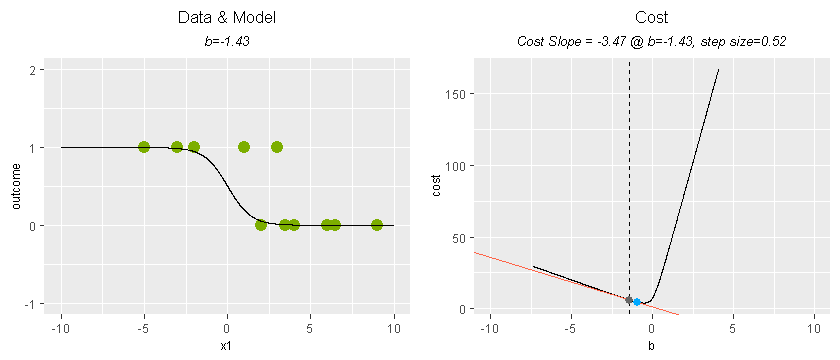

In [21]:
b = b.start
step_size = R*cost_slope(b, data$x1, data$outcome)
b = b - step_size

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-10, 10, 0.01), outcome=aaply(seq(-10, 10, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-10, 10) +  ylim(-1,2) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA 
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 2**

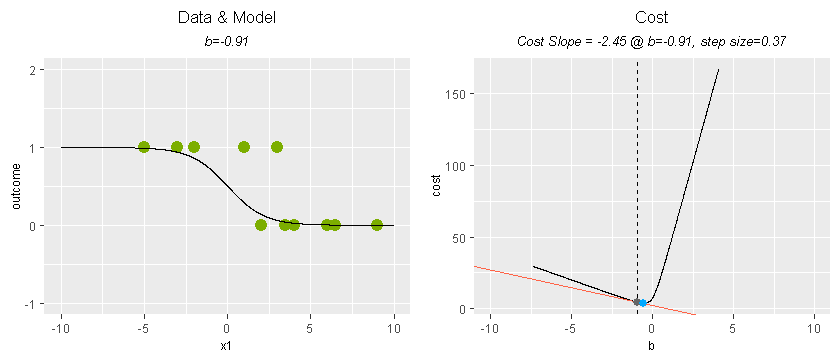

In [22]:
b = b.start
for (i in 1:2) { step_size = R*cost_slope(b, data$x1, data$outcome)
                 b = b - step_size }

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-10, 10, 0.01), outcome=aaply(seq(-10, 10, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-10, 10) +  ylim(-1,2) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA 
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 3**

Batch gradient descent with special criterion for best fit converges to optimal solution at b = -0.54.

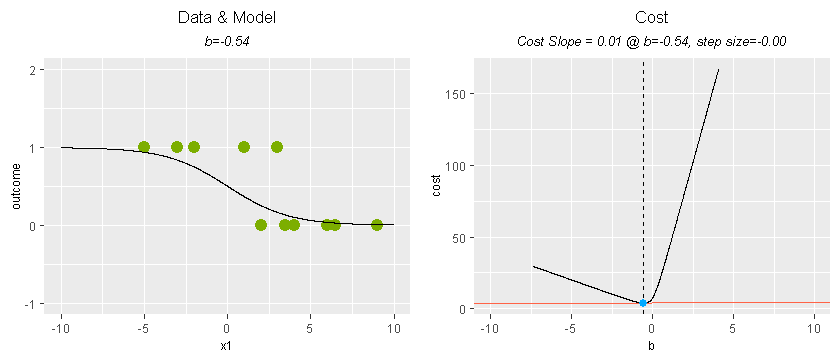

In [23]:
b = b.start
for (i in 1:3) { step_size = R*cost_slope(b, data$x1, data$outcome)
                 b = b - step_size }

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-10, 10, 0.01), outcome=aaply(seq(-10, 10, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-10, 10) +  ylim(-1,2) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-10, 10, 0.01), cost=aaply(seq(-10, 10, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA 
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

### Set Parameters | Cost Function: Sum of Squared Errors, Non-Convex, Optimal Solution

#### Data

Consider this dataset.

x1,outcome
-0.50,-10.761793
-0.40,-13.041581
-0.30,-16.056636
-0.10,-30.771308
0.01,34.799199
0.05,53.979875
0.10,7.204714
0.15,-3.183375
0.20,-8.445647
0.30,-14.709963


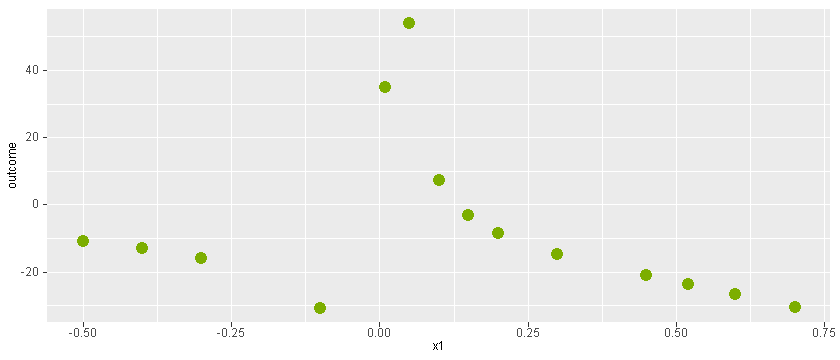

In [24]:
weird = function(x, b) { (x+b)+(1/x)+(1/(x-(b*.01)))+(x+b)^2-(x+b)^3 }
x = c(-0.5, -0.4, -0.3, -0.1, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.45, 0.52, 0.6, 0.7)
set.seed(12345); y = weird(x, 3) + 0*runif(length(x), -1, 1)
data = data.frame(x1=x, outcome=y)
data %>% caption

ggplot(data) +
geom_point(aes(x=x1, y=outcome), color=PALETTE[3])

#### Model

Form of model:
$$ \hat{y} = (x+b) + \frac{1}{x} + \frac{1}{x-0.01b} + (x+b)^2 - (x+b)^3 $$
 
Criterion for best fit (cost function):
$$ minimize \sum_{i=1}^N (y_i - \hat{y}_i)^2 = minimize \sum_{i=1}^N \big(y_i - \big((x+b) + \frac{1}{x} + \frac{1}{x-0.01b} + (x+b)^2 - (x+b)^3\big) \big)^2 $$

Criterion change rate (derivative of cost function):
$$ estimated ... $$

In [25]:
model = function(x, b) { (x+b)+(1/x)+(1/(x-(b*.01)))+(x+b)^2-(x+b)^3 }
cost = function(m, x, y) { sum(aaply(y-model(x,m), 1, function(x) x*x)) }
cost_slope = function(b, x, y) { (cost(b+0.01,x,y)-cost(b-0.01,x,y))/0.02 }
                                     
data.frame(model="function defined", cost="function defined", cost_slope="function defined" )

model,cost,cost_slope
function defined,function defined,function defined


**Initialization**

In [26]:
R = 0.00001
b.start = 4

data.frame(R, b.start)

R,b.start
0.00001,4


#### Iterate

**Iteration 0**

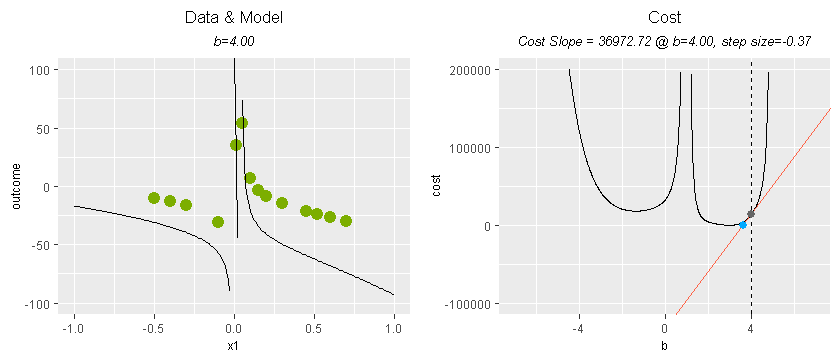

In [27]:
b = b.start
step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-1, 1, 0.01), outcome=aaply(seq(-1, 1, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-1, 1) + ylim(-100,100) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-7, 7, 0.01), cost=aaply(seq(-7, 7, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA
# d
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     ylim(-100000, 200000) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 1**

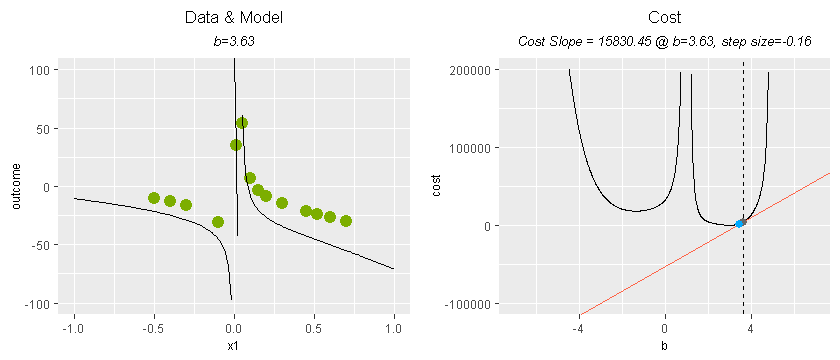

In [28]:
b = b.start
step_size = R*cost_slope(b, data$x1, data$outcome)
b = b - step_size

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-1, 1, 0.01), outcome=aaply(seq(-1, 1, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-1, 1) + ylim(-100,100) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-7, 7, 0.01), cost=aaply(seq(-7, 7, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA
# d
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     ylim(-100000, 200000) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 2**

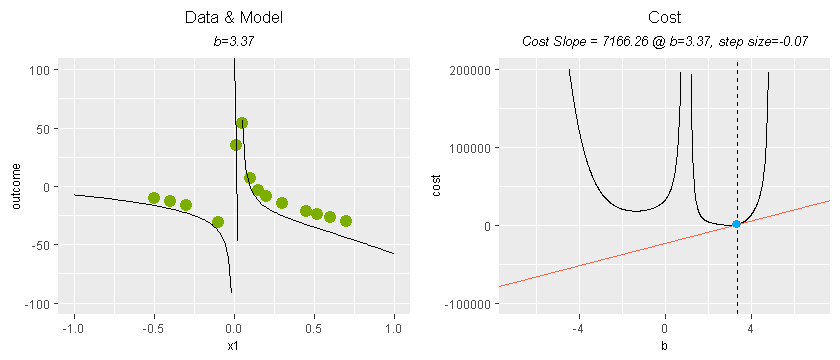

In [29]:
b = b.start
for (i in 1:2) { step_size = R*cost_slope(b, data$x1, data$outcome)
                 b = b - step_size }

step_size = R*cost_slope(b, data$x1, data$outcome)
b = b - step_size

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-1, 1, 0.01), outcome=aaply(seq(-1, 1, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-1, 1) + ylim(-100,100) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-7, 7, 0.01), cost=aaply(seq(-7, 7, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA
# d
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     ylim(-100000, 200000) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 100**

Batch gradient descent starting at b = 4 converges to optimal solution at b = 3.

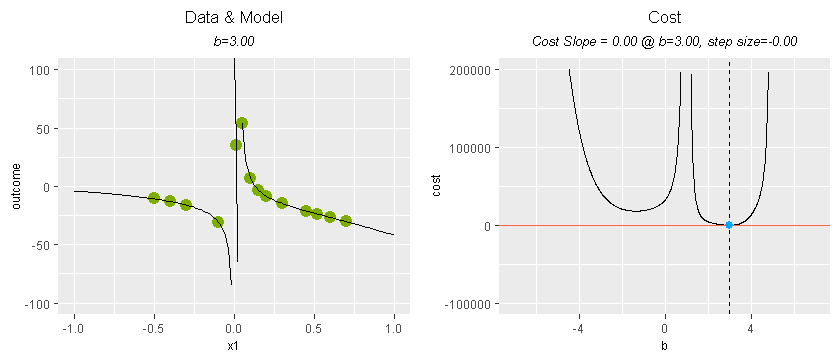

In [30]:
b = b.start
for (i in 1:100) { step_size = R*cost_slope(b, data$x1, data$outcome)
                 b = b - step_size }

step_size = R*cost_slope(b, data$x1, data$outcome)
b = b - step_size

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-1, 1, 0.01), outcome=aaply(seq(-1, 1, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-1, 1) + ylim(-100,100) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-7, 7, 0.01), cost=aaply(seq(-7, 7, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA
# d
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     ylim(-100000, 200000) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

### Set Parameters | Cost: Sum of Squared Errors, Non-Convex, Non-Optimal Solution

**Initiatialization**

In [31]:
R = 0.00001
b.start = -4

data.frame(R, b.start)

R,b.start
0.00001,-4


**Iteration 0**

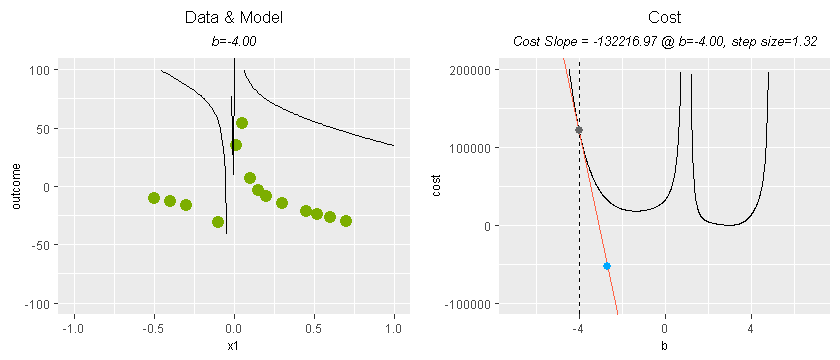

In [32]:
b = b.start
step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-1, 1, 0.01), outcome=aaply(seq(-1, 1, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-1, 1) + ylim(-100,100) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d, na.rm=TRUE)

d = data.frame(b=seq(-7, 7, 0.01), cost=aaply(seq(-7, 7, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA
# d
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     ylim(-100000, 200000) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 1**

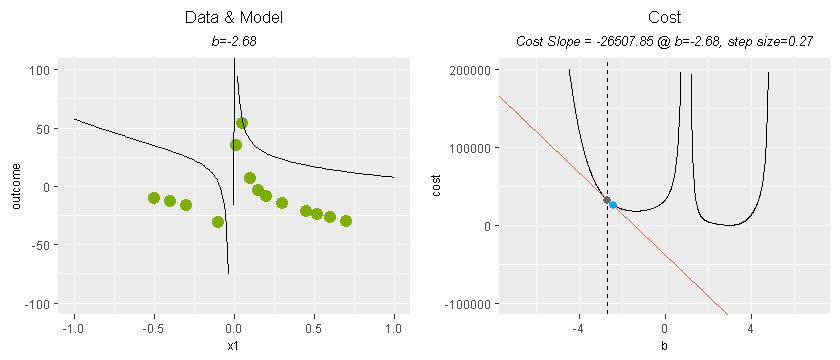

In [33]:
b = b.start
step_size = R*cost_slope(b, data$x1, data$outcome)
b = b - step_size

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-1, 1, 0.01), outcome=aaply(seq(-1, 1, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-1, 1) + ylim(-100,100) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-7, 7, 0.01), cost=aaply(seq(-7, 7, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA
# d
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     ylim(-100000, 200000) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 2**

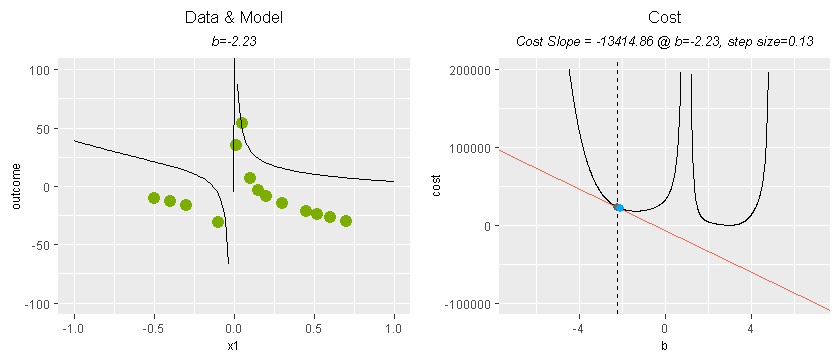

In [34]:
b = b.start
for (i in 1:2) { step_size = R*cost_slope(b, data$x1, data$outcome)
                 b = b - step_size }

step_size = R*cost_slope(b, data$x1, data$outcome)
b = b - step_size

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-1, 1, 0.01), outcome=aaply(seq(-1, 1, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-1, 1) + ylim(-100,100) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-7, 7, 0.01), cost=aaply(seq(-7, 7, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA
# d
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     ylim(-100000, 200000) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

**Iteration 100**

Batch gradient descent starting from b = -4 converges to a non-optimal solution at b = -1.36.

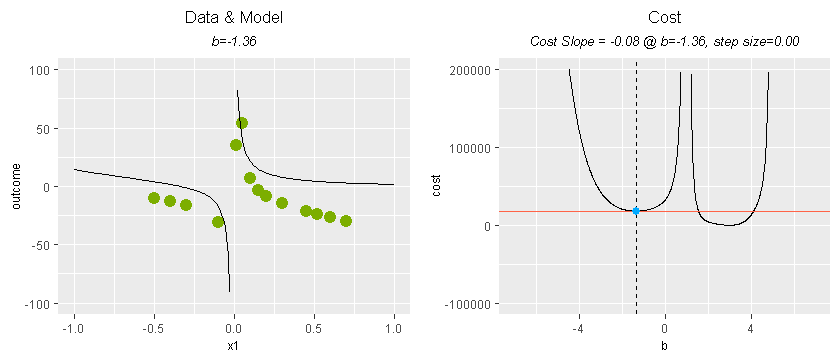

In [35]:
b = b.start
for (i in 1:100) { step_size = R*cost_slope(b, data$x1, data$outcome)
                 b = b - step_size }

step_size = R*cost_slope(b, data$x1, data$outcome)
b = b - step_size

step_size = R*cost_slope(b, data$x1, data$outcome)
b.next = b - step_size

d = data.frame(x1=seq(-1, 1, 0.01), outcome=aaply(seq(-1, 1, 0.01), 1, function(x) model(x, b)))
p1 = ggplot(data) +
     ggtitle("Data & Model", sprintf("b=%0.2f", b)) +
     xlim(-1, 1) + ylim(-100,100) +
     geom_point(aes(x=x1, y=outcome), color=PALETTE[3]) +
     geom_line(aes(x=x1, y=outcome), data=d)

d = data.frame(b=seq(-7, 7, 0.01), cost=aaply(seq(-7, 7, 0.01), 1, function(b) cost(b, data$x1, data$outcome)))
d[is.infinite(d$cost), "cost"] = NA
# d
tangent.intercept = cost(b, data$x1, data$outcome)-cost_slope(b, data$x1, data$outcome)*b
tangent.slope = cost_slope(b, data$x1, data$outcome)
p2 = ggplot(d) +
     ggtitle("Cost", sprintf("Cost Slope = %0.2f @ b=%0.2f, step size=%0.2f", cost_slope(b, data$x1, data$outcome), b, -step_size)) +
     ylim(-100000, 200000) +
     geom_line(aes(x=b, y=cost), na.rm=TRUE) +
     geom_vline(xintercept=b, lty="dashed") +
     geom_abline(intercept=tangent.intercept, slope=tangent.slope, color=PALETTE[2]) +
     geom_point(x=b, y=cost(b, data$x1, data$outcome), size=2) +
     geom_point(x=b.next, y=tangent.intercept+tangent.slope*b.next, color=PALETTE[1], size=2)
                                                
grid.arrange(p1, p2, nrow=1)

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised October 4, 2019
</span>
</p>